# North East Atlantic Current Sea Surface Velocity Plot

In [34]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [35]:
# define path to the data file
path = "../data/surface-velocity.csv"

In [36]:
# read file
df = pd.read_csv(path, skiprows=[1])
df

,time,latitude,longitude,sea_surface_x_velocity,sea_surface_y_velocity
0,2025-04-11T00:00:00Z,48.00625,-17.99375,0.106128,-0.032146
1,2025-04-11T00:00:00Z,48.00625,-17.98125,0.106128,-0.032146
2,2025-04-11T00:00:00Z,48.00625,-17.96875,0.106128,-0.032146
3,2025-04-11T00:00:00Z,48.00625,-17.95625,0.106128,-0.032146
4,2025-04-11T00:00:00Z,48.00625,-17.94375,0.292636,0.017609
...,...,...,...,...,...
1087995,2025-04-11T00:00:00Z,57.99375,-1.05625,NaN,NaN
1087996,2025-04-11T00:00:00Z,57.99375,-1.04375,NaN,NaN
1087997,2025-04-11T00:00:00Z,57.99375,-1.03125,NaN,NaN
1087998,2025-04-11T00:00:00Z,57.99375,-1.01875,NaN,NaN


In [37]:
# define speed as a magnitude of velocity
df['speed'] = np.sqrt(df['sea_surface_x_velocity']**2 + df['sea_surface_y_velocity']**2)

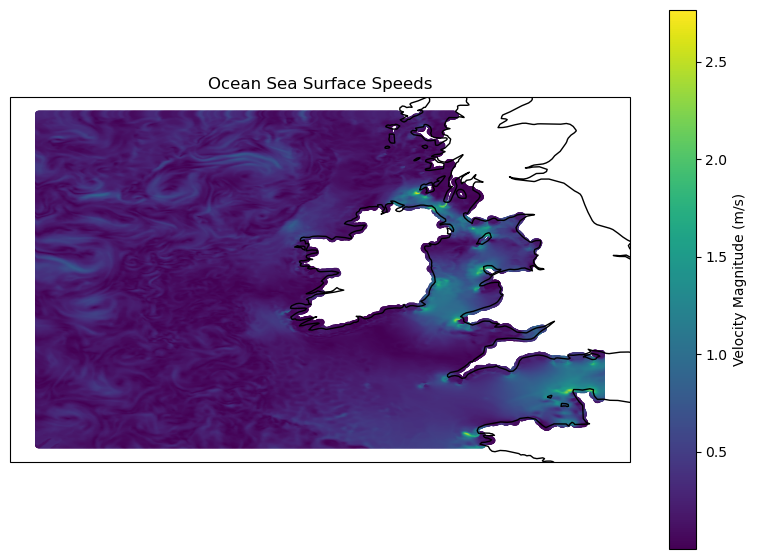

In [38]:
# plot sea surface speeds on a map
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

sc = ax.scatter(df['longitude'], df['latitude'], c=df['speed'],
                cmap='viridis', s=20, edgecolor='none',
                transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Velocity Magnitude (m/s)')

plt.title('Ocean Sea Surface Speeds')
plt.show()